### Homework IV: API's and Webscraping

In [161]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

#### Question 1

Using the LastFM API, look up your five favorite artists (using [here](https://www.last.fm/api/show/artist.getTopAlbums)) top albums and create a DataFrame of your results formatted as shown below:

| Artist | Album | Album Art Link |
| ------ | ------ | ------------  |
| Riff Raff | Pink Panther | www.lastfm.com/panther |
| Slayer | South of Heaven | www.lastfm.com/slay |

In [162]:
api_key = 'ecc029db2174a909454b9bacebb4e6f4'

In [163]:
# list of my top 5 favorite artists
artists = ['The Weeknd', 'SZA', 'Coldplay', 'Rihanna', 'Lana Del Ray']

In [164]:
# make an empty list to store top albums
top_albums_list = []

In [165]:
# get each artist's top album and store its name and image link
for artist in artists:
    url = f'https://ws.audioscrobbler.com/2.0/?method=artist.gettopalbums&artist={artist}&api_key={api_key}&format=json'
    r = requests.get(url)
    data = r.json()

    # take only the top 1 album (first in the list)
    top_album = data['topalbums']['album'][0]
    album_name = top_album['name']
    album_image = top_album['image'][-1]['#text'] # use -1 to get the largest available album image

    # add the artist's top album info to the list
    top_albums_list.append({'Artist': artist, 'Album': album_name, 'Album Art Link': album_image})

In [166]:
# convert the list into data frame
df = pd.DataFrame(top_albums_list)
df

,Artist,Album,Album Art Link
0,The Weeknd,Starboy,https://lastfm.freetls.fastly.net/i/u/300x300/...
1,SZA,SOS,https://lastfm.freetls.fastly.net/i/u/300x300/...
2,Coldplay,Parachutes,https://lastfm.freetls.fastly.net/i/u/300x300/...
3,Rihanna,Good Girl Gone Bad: Reloaded,https://lastfm.freetls.fastly.net/i/u/300x300/...
4,Lana Del Ray,Born to Die - The Paradise Edition,https://lastfm.freetls.fastly.net/i/u/300x300/...


#### Question 2

Using the LastFM API, look up tracks similar (using [this](https://www.last.fm/api/show/track.getSimilar)) to Quicksand's song Fazer.  Assemble the results in a DataFrame with the format given below:

| Artist | Song | Playcount | Match % | Duration |
| ------ | ------- | ------ | ------ | ---------- |
| quicksand | can opener | 98218 | 1.0 | 219 |

In [167]:
# url to get tracks similar to Fazer
url_2 = f'https://ws.audioscrobbler.com/2.0/?method=track.getsimilar&artist=Quicksand&track=Fazer&api_key={api_key}&format=json'

In [168]:
# create a request and convert to json
r = requests.get(url_2)
data = r.json()

In [169]:
# make an empty list to store similar tracks
similar_tracks = []

In [170]:
# get info for each similar track and add to the list
for track in data['similartracks']['track']:
    artist_name = track['artist']['name']
    song_name = track['name']
    playcount = track.get('playcount')
    match_percent = track['match']
    duration = track['duration']

    similar_tracks.append({
        'Artist': artist_name,
        'Song': song_name,
        'Playcount': playcount,
        'Match %': match_percent,
        'Duration': duration
    })

In [171]:
# convert to data frame
df_2 = pd.DataFrame(similar_tracks)
df_2

,Artist,Song,Playcount,Match %,Duration
0,Quicksand,Dine Alone,259948,1.000000,208
1,Quicksand,Head To Wall,213145,0.454291,187
2,Helmet,In the Meantime,641295,0.177655,186
3,Helmet,Give It,270355,0.156471,0
4,At the Drive-In,Arcarsenal,2017062,0.133990,175
...,...,...,...,...,...
95,Bitch Magnet,Spite y Malice,19790,0.046402,187
96,The Jesus Lizard,Tight n' Shiny,24999,0.046204,131
97,Title Fight,Flood Of '72,1435857,0.045963,116
98,The Blood Brothers,Trash Flavored Trash,562026,0.044915,158


#### Question 3

arXiv is an open source space for academic papers to be published.  They have a freely accessible API [here](https://info.arxiv.org/help/api/user-manual.html#arxiv-api-users-manual).  In order to parse the responses, you will need to use the BeautifulSoup library and turn the text of the response into a soup object that is then searched.

Your objective is to write a function that takes in a search term and returns a `DataFrame` with the article date, title, authors, summary, and article url as columns of the `DataFrame`.

In [172]:
# create the function
def search_arxiv(term, max_results=5):
    # input the api url
    url = f'http://export.arxiv.org/api/query?search_query=all:{term}&start=0&max_results={max_results}'

    # get the response
    r = requests.get(url)

    # convert it to beautiful soup
    soup = BeautifulSoup(r.text, 'xml')  # arXiv returns xml

    # find all entries (articles)
    entries = soup.find_all('entry')

    # list to store results
    results = []

    for entry in entries:
        date = entry.published.text
        title = entry.title.text.strip()
        authors = ', '.join([author.find('name').text for author in entry.find_all('author')])
        summary = entry.summary.text.strip()
        link = entry.id.text

        results.append({
            'Date': date,
            'Title': title,
            'Authors': authors,
            'Summary': summary,
            'URL': link
        })

    # create a data frame
    df = pd.DataFrame(results)
    return df

In [173]:
# use the function to get 5 articles about a search term
# I will be using 'finance' as the seacrh term
df = search_arxiv('finance', max_results=5)
df

,Date,Title,Authors,Summary,URL
0,2017-10-09T17:45:44Z,Behavioral Finance -- Asset Prices Predictabil...,"Svetlozar Rachev, Stoyan Stoyanov, Stefan Mitt...",In this paper we address three main objections...,http://arxiv.org/abs/1710.03211v2
1,2020-09-18T07:43:19Z,International Trade Finance from the Origins t...,"Olivier Accominotti, Stefano Ugolini",This chapter presents a history of internation...,http://arxiv.org/abs/2009.08668v1
2,2021-07-20T01:39:10Z,"AI in Finance: Challenges, Techniques and Oppo...",Longbing Cao,AI in finance broadly refers to the applicatio...,http://arxiv.org/abs/2107.09051v1
3,2022-11-28T16:39:35Z,A model-free approach to continuous-time finance,"Henry Chiu, Rama Cont","We present a non-probabilistic, pathwise appro...",http://arxiv.org/abs/2211.15531v1
4,2024-08-14T15:08:51Z,A Survey on Blockchain-based Supply Chain Fina...,Zhengdong Luo,Supply Chain Finance is very important for sup...,http://arxiv.org/abs/2408.08915v1


#### Question 4

The world bank has a Python wrapper for its api called `wbgapi`.  Examine the documentation [here](https://pypi.org/project/wbgapi/) and chose an endpoint(s) to query.  Find at least two endpoints of interest and create visualizations of this data.  Write a sentence or two about what you've found.

In [174]:
!pip install wbgapi

**GRAPH 1**

In [175]:
import wbgapi as wb

In [176]:
# choose a few countries to compare (USA and China)
countries_gdp = ['USA', 'CHN']

In [177]:
# get the GDP per capita data (from 2000 to 2021)
gdp_data = wb.data.DataFrame('NY.GDP.PCAP.CD', economy=countries_gdp, time=range(2000, 2021))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

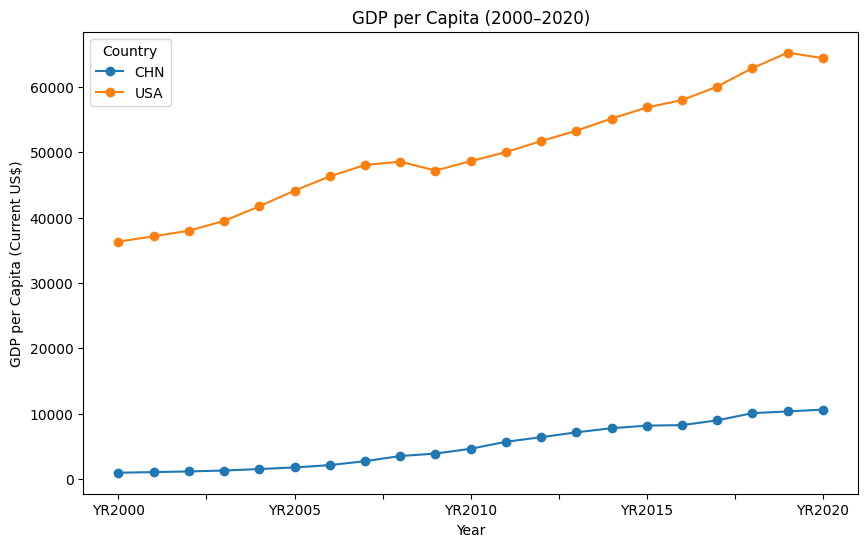

In [178]:
# plot the data and labeling
gdp_data.T.plot(figsize=(10,6), marker='o')  # transpose so countries become lines
plt.title('GDP per Capita (2000–2020)')
plt.ylabel('GDP per Capita (Current US$)')
plt.xlabel('Year')
plt.legend(title='Country')
plt

**I used the wbgapi library to get GDP per capita data (NY.GDP.PCAP.CD) for the USA and China from 2000 to 2020 and plotted it as a line graph. The USA has a higher GDP per capita throughout, and both countries show growth. China’s growth is steadier, and the USA’s line is slightly more volatile.**

**GRAPH 2**

In [179]:
# choose a few countries to compare (USA and India)
countries = ['USA','IND']

In [180]:
# get renewable energy data (from 2000 to 2016)
renewable_energy_data = wb.data.DataFrame('EG.ELC.RNEW.ZS', economy=countries, time=range(2000,2016))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

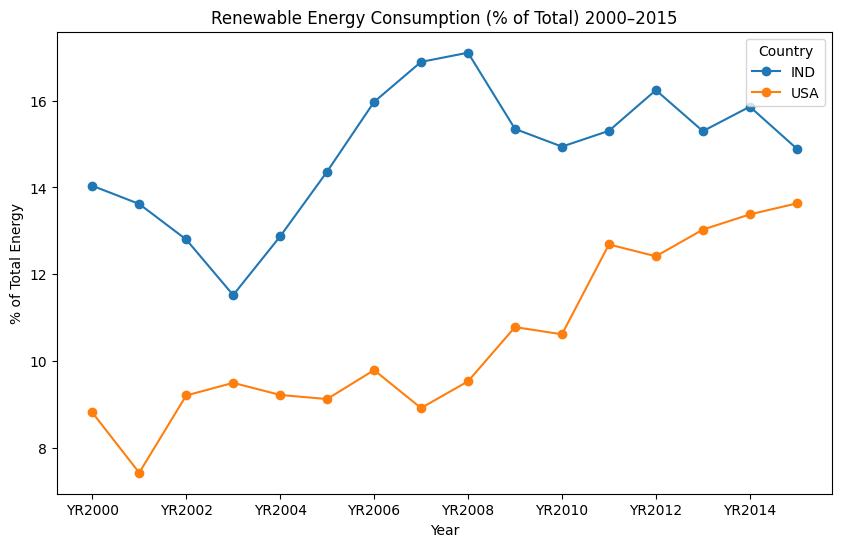

In [181]:
# plot the countries as a separate lines and label
renewable_energy_data.T.plot(figsize=(10,6), marker='o')  # transpose so countries become lines
plt.title('Renewable Energy Consumption (% of Total) 2000–2015')
plt.ylabel('% of Total Energy')
plt.xlabel('Year')
plt.legend(title='Country')
plt

**I used the wbgapi library to get data on renewable energy share in electricity consumption (EG.ELC.RNEW.ZS) for the USA and India from 2000 to 2015 and plotted it as a line graph. India’s share is higher and more variable, while the USA’s share stays lower and steadier. After 2014, USA's share seems to be catching up to India's.**

#### Question 5


Find an api of interest to you -- here is a list of some but feel free to google around [api list](https://github.com/public-apis/public-apis).  Ask a specific question that you want to use the data from the api to answer, make an appropriate request of the endpoints and do your best to provide an answer to your question asked.

-------
For example, maybe I'm interested in finding out recent artists similar to Rod Stewart.  I could use the LastFM api for this.  Perhaps you're interested in a lyrical analysis of Drake vs. Kendrick Lamar -- and want to compare the lexical diversity of different tracks; you can use the genius api for this.  Maybe I want to build an app to show a random cat picture with a dad joke.  The cat api and jokes api might work here.

**Question: Which dog breeds have the most sub-breeds?**

In [182]:
# fetch list of dog breeds
url = "https://dog.ceo/api/breeds/list/all"
response = requests.get(url)
data = response.json()

In [183]:
# convert to data frame
breeds = pd.DataFrame({
    "breed": data["message"].keys(),
    # counts how many sub-breeds each breed has and turning it into a coloumn
    "subbreed_count": [len(v) for v in data["message"].values()]
    })

In [184]:
# sort by number of sub-breeds (top 10)
top_breeds = breeds.sort_values("subbreed_count", ascending=False).head(10)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

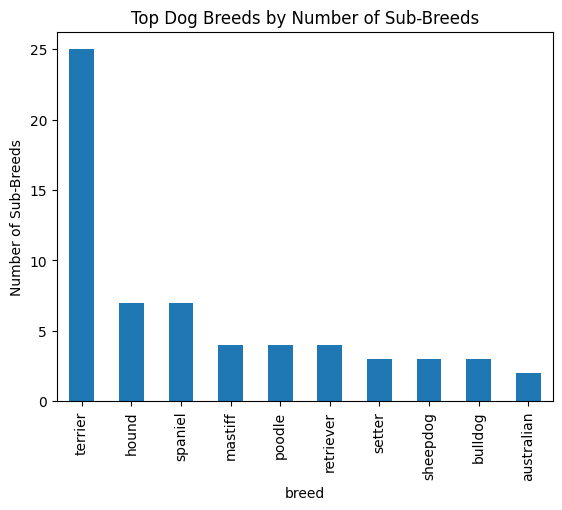

In [185]:
# plot the data and label
top_breeds.plot(kind='bar', x='breed', y='subbreed_count', legend=False)
plt.title("Top Dog Breeds by Number of Sub-Breeds")
plt.ylabel("Number of Sub-Breeds")
plt

**This code uses the Dog CEO API to find how many sub-breeds each dog breed has.
It then displays the top ten breeds with the most sub-breeds.
From the chart, we can see that the terrier has a significantly greatest variety of sub-breeds than the rest.**

#### Question 6

Use the `praw` api [here](https://praw.readthedocs.io/en/stable/) to extract posts from the `r/nyu` subreddit.  What posts are getting the most activity?

In [186]:
!pip install praw

In [187]:
import praw

# connect to reddit API and input account credentials
reddit = praw.Reddit(
    client_id = 'xoqjk6xZC38VcDyNZ-ZcDw' ,
    client_secret = 'IKqWlKvSb67Z-VZGiVD-8NvmUkX1qw',
    user_agent = 'nyu_most_popular')

In [188]:
# get 'hot' posts from r/nyu
posts = []
subreddit = reddit.subreddit('nyu')

for post in subreddit.hot(limit=20):
    posts.append([post.title, post.score, post.num_comments])

# Note: I used subreddit.hot() instead of subreddit.top() because the question asks
# for posts that are 'getting' the most activity right now.
# this will return the currently active and trending posts.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [189]:
# make a data frame
df = pd.DataFrame(posts, columns=['Title', 'Upvotes', 'Comments'])
df['Total Activity'] = df['Upvotes'] + df['Comments'] #total activity is calculated by adding the upvotes and comments
df = df.sort_values('Total Activity', ascending=False)

df.head()

,Title,Upvotes,Comments,Total Activity
12,Friends on campus,33,13,46
16,Campus ministry gives Free Food on Tuesdays @ 6pm,40,1,41
6,Roommate change,15,8,23
0,"[Megathread] Prospective Students, Application...",10,12,22
3,Anything interesting happen on campus lately?,8,13,21


**To determine the total activity, the code calculates total activity as the sum of upvotes and comments to see which posts get the most engagement. As shown in the table, the "Friends on Campus" post on r/nyu has the most total activity combined (from the 'Hot' posts which are *not* the same as the all-time most popular 'Top' posts).**

#### Question 7

Head over to [books to scrape](https://books.toscrape.com/).  Use `BeautifulSoup` to extract all the book titles and prices and assemble these in a DataFrame with two columns appropriately titled.

In [190]:
# get the webpage
url = "https://books.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [191]:
# extract all book titles and prices (using inspect to find the relevant info)
titles = [book.h3.a['title'] for book in soup.find_all('article', class_='product_pod')]
prices = [price.text for price in soup.find_all('p', class_='price_color')]

In [192]:
# create a data frame
books_df = pd.DataFrame({
    "Title": titles,
    "Price": prices
})

# check results
books_df

,Title,Price
0,A Light in the Attic,Â£51.77
1,Tipping the Velvet,Â£53.74
2,Soumission,Â£50.10
3,Sharp Objects,Â£47.82
4,Sapiens: A Brief History of Humankind,Â£54.23
5,The Requiem Red,Â£22.65
6,The Dirty Little Secrets of Getting Your Dream...,Â£33.34
7,The Coming Woman: A Novel Based on the Life of...,Â£17.93
8,The Boys in the Boat: Nine Americans and Their...,Â£22.60
9,The Black Maria,Â£52.15


#### Question 8

Head over to the [Countries of the World](https://www.scrapethissite.com/pages/simple/) site.  Use requests and BeautifulSoup to scrape all countries (250) data and assemble as a DataFrame with columns:

| Country | Capital | Population | Area (km$^2$) | People/km$^2$ |
| -----  | -------- | ---------  | ------------  | ------------  |
| Andorra | Andorra la Vella | 84000 | 468.0 | 179.49 |

In [193]:
# get the webpage
url = "https://www.scrapethissite.com/pages/simple/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [194]:
# find all country rows
rows = soup.select(".country")

In [195]:
# extract the data (again, using inspect feature to find relevant info)
data = []
for row in rows:
    country = row.select_one(".country-name").text.strip()
    capital = row.select_one(".country-capital").text.strip()
    population = row.select_one(".country-population").text.strip().replace(",", "")
    area = row.select_one(".country-area").text.strip().replace(",", "")

    population_val = int(population)
    area_val = float(area)

   # calculate density avoid division by zero for the 'people/km2' column
    if area_val == 0:
        density_val = None
    else:
        density_val = round(population_val / area_val, 2)

    data.append([country, capital, population_val, area_val, density_val])

In [196]:
# make a data frame
df = pd.DataFrame(data, columns=["Country", "Capital", "Population", "Area (km^2 )", "People/km^2"])

In [197]:
# check result
df

,Country,Capital,Population,Area (km^2 ),People/km^2
0,Andorra,Andorra la Vella,84000,468.0,179.49
1,United Arab Emirates,Abu Dhabi,4975593,82880.0,60.03
2,Afghanistan,Kabul,29121286,647500.0,44.97
3,Antigua and Barbuda,St. John's,86754,443.0,195.83
4,Anguilla,The Valley,13254,102.0,129.94
...,...,...,...,...,...
245,Yemen,Sanaa,23495361,527970.0,44.50
246,Mayotte,Mamoudzou,159042,374.0,425.25
247,South Africa,Pretoria,49000000,1219912.0,40.17
248,Zambia,Lusaka,13460305,752614.0,17.88
